In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import neighbors

from sklearn import linear_model
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import pipeline
from sklearn import preprocessing

import warnings
from os import environ

In [2]:
warnings.simplefilter("ignore")
environ["PYTHONWARNINGS"] = "ignore"

In [3]:
SEED = 42
np.random.seed(SEED)
kf = model_selection.RepeatedKFold(n_repeats=5, n_splits=5, random_state=SEED)

In [4]:
df = pd.read_csv('logP.csv')

y = df.logP
X = df.iloc[:, 3:]
X_norm = preprocessing.StandardScaler().fit_transform(X)

X_new = pd.DataFrame(X_norm, columns = X.columns)

In [5]:
pipe = pipeline.Pipeline(
    [
        
        ("kNN", neighbors.KNeighborsRegressor()),
    ]
)

## search 1

In [14]:
param_grid = {
    "kNN__n_neighbors": np.arange(1, 201, 20),
    "kNN__p": np.linspace(0.1, 5, 10),
    "kNN__weights": ['uniform', 'distance'],
}

In [15]:
search = model_selection.GridSearchCV(
    pipe,
    param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [ ]:
search.fit(X_new, y)

In [20]:
res_df = pd.DataFrame(search.cv_results_)
res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kNN__n_neighbors,param_kNN__p,param_kNN__weights,params,split0_test_score,split1_test_score,...,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002819,0.000399,0.036474,0.008564,1,0.1,uniform,"{'kNN__n_neighbors': 1, 'kNN__p': 0.1, 'kNN__w...",-0.309228,0.004275,...,0.013335,-0.525750,-0.058553,0.180472,-1.102748,-0.377763,-0.941904,-0.422015,0.345929,199
1,0.002181,0.000284,0.024584,0.003695,1,0.1,distance,"{'kNN__n_neighbors': 1, 'kNN__p': 0.1, 'kNN__w...",-0.309228,0.004275,...,0.013335,-0.525750,-0.058553,0.180472,-1.102748,-0.377763,-0.941904,-0.422015,0.345929,199
2,0.002191,0.000332,0.025644,0.004679,1,0.644444,uniform,"{'kNN__n_neighbors': 1, 'kNN__p': 0.6444444444...",-0.106699,0.396959,...,0.280371,-0.250196,-0.347977,0.275534,-0.494645,0.114127,-0.752500,-0.210098,0.312438,188
3,0.001900,0.000231,0.026412,0.005094,1,0.644444,distance,"{'kNN__n_neighbors': 1, 'kNN__p': 0.6444444444...",-0.106699,0.396959,...,0.280371,-0.250196,-0.347977,0.275534,-0.494645,0.114127,-0.752500,-0.210098,0.312438,187
4,0.001958,0.000291,0.025494,0.006078,1,1.188889,uniform,"{'kNN__n_neighbors': 1, 'kNN__p': 1.1888888888...",-0.176771,0.334838,...,0.320056,-0.036962,-0.462094,0.302704,-0.478735,0.209827,-0.754563,-0.171244,0.307911,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001712,0.000180,0.025676,0.003776,181,3.911111,distance,"{'kNN__n_neighbors': 181, 'kNN__p': 3.91111111...",0.016820,0.024267,...,0.028473,-0.104078,0.014163,0.024954,-0.016447,-0.093934,-0.224814,-0.011165,0.056915,175
196,0.001752,0.000154,0.027181,0.006652,181,4.455556,uniform,"{'kNN__n_neighbors': 181, 'kNN__p': 4.45555555...",-0.009985,-0.002957,...,0.000267,0.001611,0.001336,-0.003521,-0.033818,-0.055525,-0.086492,-0.018349,0.025840,178
197,0.001758,0.000154,0.026870,0.004529,181,4.455556,distance,"{'kNN__n_neighbors': 181, 'kNN__p': 4.45555555...",0.009945,0.018647,...,0.020540,-0.106851,0.011641,0.019764,-0.021273,-0.103833,-0.231796,-0.016646,0.057253,177
198,0.001834,0.000291,0.028258,0.006755,181,5.0,uniform,"{'kNN__n_neighbors': 181, 'kNN__p': 5.0, 'kNN_...",-0.009237,-0.002640,...,0.001755,-0.000380,0.001016,-0.002927,-0.034505,-0.057771,-0.085770,-0.018802,0.025734,179


<Axes: xlabel='param_kNN__n_neighbors'>

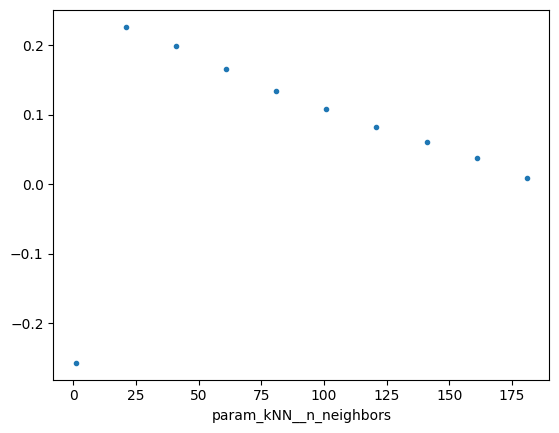

In [23]:
res_df.groupby('param_kNN__n_neighbors').mean_test_score.mean().plot(style = '.')

<Axes: xlabel='param_kNN__p'>

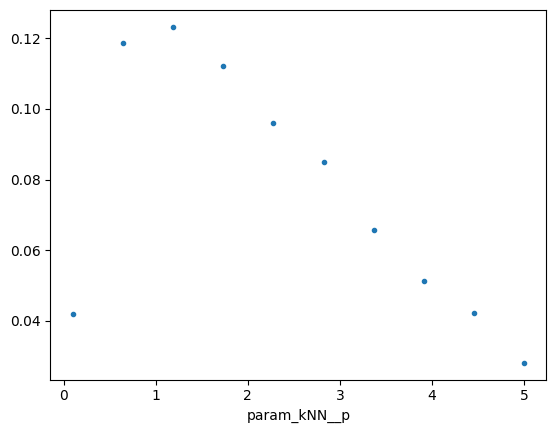

In [25]:
res_df.groupby('param_kNN__p').mean_test_score.mean().plot(style = '.')

<Axes: ylabel='mean_test_score'>

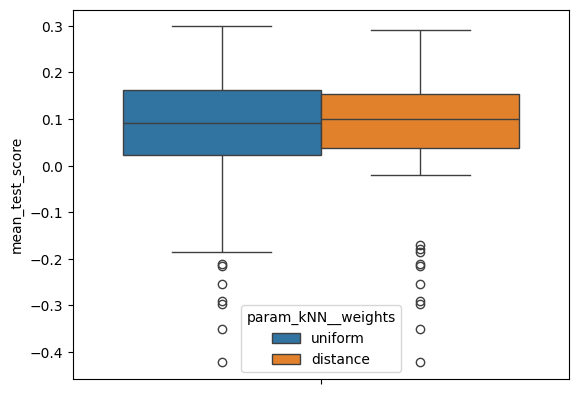

In [30]:
sns.boxplot(data = res_df, y = 'mean_test_score', hue = 'param_kNN__weights')

In [37]:
search.best_params_

{'kNN__n_neighbors': 21,
 'kNN__p': 0.6444444444444445,
 'kNN__weights': 'uniform'}

In [34]:
search.best_score_

0.2990402884619735

In [40]:
select_kNN = feature_selection.SequentialFeatureSelector(neighbors.KNeighborsRegressor(n_neighbors = 21, p = 0.6444444444444445, weights = 'uniform'), n_jobs=-1, cv=kf)
select_kNN.fit(X, y)

SequentialFeatureSelector(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=42),
                          estimator=KNeighborsRegressor(n_neighbors=21,
                                                        p=0.6444444444444445),
                          n_jobs=-1)

In [41]:
X_sel_feat_knn_names = X_new.columns[select_kNN.get_support()]
X_sel_feat_knn = X_new[X_sel_feat_knn_names]
X_sel_feat_knn


,QED_score,MinAbsEStateIndex,MinEStateIndex,qed,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.787269,-0.656476,0.800563,1.773381,0.0,-0.691372,-1.139513,1.077608,-0.678012,-0.266863,...,0.0,-0.338906,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907
1,0.763026,-0.886730,-2.143769,0.764827,0.0,1.950212,-1.141766,1.079964,2.323390,1.518868,...,0.0,-0.338906,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907
2,0.602073,5.799582,1.384245,0.602666,0.0,-2.854907,0.435702,-0.570367,-3.136249,-2.543670,...,0.0,-0.338906,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907
3,-0.890396,1.380012,-0.097196,-0.876677,0.0,-1.245672,-0.689729,0.607048,-1.307815,-1.393091,...,0.0,-0.338906,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907
4,0.426488,-0.047930,0.855580,0.424867,0.0,-2.502378,1.707483,-1.900892,-2.735700,-0.114670,...,0.0,-0.338906,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.114195,-0.352307,0.511069,1.107501,0.0,-0.495609,1.120213,-1.286496,-0.455584,0.003702,...,0.0,2.723802,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907
240,-0.729444,-0.484305,0.652094,-0.705992,0.0,-0.267581,-1.053812,0.987948,-0.196495,-1.393091,...,0.0,-0.338906,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907
241,0.543545,1.220209,-0.226124,0.542751,0.0,-1.245888,0.356242,-0.487236,-1.308060,-1.520933,...,0.0,-0.338906,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907
242,-0.539227,-0.146797,0.355675,-0.530112,0.0,-0.738257,-2.223103,2.211249,-0.731283,0.098400,...,0.0,-0.338906,-0.356087,-0.158777,0.0,-0.06415,0.0,-0.326584,-0.122373,-0.184907


In [42]:

model_selection.cross_val_score(neighbors.KNeighborsRegressor(n_neighbors = 21, p = 0.6444444444444445, weights = 'uniform'), X_sel_feat_knn, y, cv=kf).mean()

0.2855261341188915

## search2

In [31]:
param_grid2 = {
    "kNN__n_neighbors": np.arange(15, 40, 1),
    "kNN__p": np.linspace(1, 1.5, 10),
}

In [32]:
search2 = model_selection.GridSearchCV(
    pipe,
    param_grid2,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [33]:
search2.fit(X_new, y)

Fitting 25 folds for each of 250 candidates, totalling 6250 fits
[CV 1/25] END ..kNN__n_neighbors=15, kNN__p=1.0;, score=0.213 total time=   0.0s
[CV 25/25] END .kNN__n_neighbors=15, kNN__p=1.0;, score=0.227 total time=   0.0s
[CV 1/25] END kNN__n_neighbors=15, kNN__p=1.0555555555555556;, score=0.209 total time=   0.0s
[CV 2/25] END kNN__n_neighbors=15, kNN__p=1.0555555555555556;, score=0.440 total time=   0.0s
[CV 3/25] END kNN__n_neighbors=15, kNN__p=1.0555555555555556;, score=0.262 total time=   0.0s
[CV 4/25] END kNN__n_neighbors=15, kNN__p=1.0555555555555556;, score=0.264 total time=   0.0s
[CV 2/25] END ..kNN__n_neighbors=15, kNN__p=1.0;, score=0.441 total time=   0.0s
[CV 3/25] END ..kNN__n_neighbors=15, kNN__p=1.0;, score=0.278 total time=   0.0s
[CV 5/25] END kNN__n_neighbors=15, kNN__p=1.0555555555555556;, score=0.228 total time=   0.0s
[CV 4/25] END ..kNN__n_neighbors=15, kNN__p=1.0;, score=0.269 total time=   0.0s
[CV 5/25] END ..kNN__n_neighbors=15, kNN__p=1.0;, score=0.24

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('kNN', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39]),
                         'kNN__p': array([1.        , 1.05555556, 1.11111111, 1.16666667, 1.22222222,
       1.27777778, 1.33333333, 1.38888889, 1.44444444, 1.5       ])},
             verbose=3)

In [36]:
search2.best_score_

0.291486872053115

In [39]:
search2.best_params_

{'kNN__n_neighbors': 23, 'kNN__p': 1.1111111111111112}

In [35]:
res_df = pd.DataFrame(search2.cv_results_)
res_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kNN__n_neighbors,param_kNN__p,param_kNN__weights,params,split0_test_score,split1_test_score,...,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002819,0.000399,0.036474,0.008564,1,0.1,uniform,"{'kNN__n_neighbors': 1, 'kNN__p': 0.1, 'kNN__w...",-0.309228,0.004275,...,0.013335,-0.525750,-0.058553,0.180472,-1.102748,-0.377763,-0.941904,-0.422015,0.345929,199
1,0.002181,0.000284,0.024584,0.003695,1,0.1,distance,"{'kNN__n_neighbors': 1, 'kNN__p': 0.1, 'kNN__w...",-0.309228,0.004275,...,0.013335,-0.525750,-0.058553,0.180472,-1.102748,-0.377763,-0.941904,-0.422015,0.345929,199
2,0.002191,0.000332,0.025644,0.004679,1,0.644444,uniform,"{'kNN__n_neighbors': 1, 'kNN__p': 0.6444444444...",-0.106699,0.396959,...,0.280371,-0.250196,-0.347977,0.275534,-0.494645,0.114127,-0.752500,-0.210098,0.312438,188
3,0.001900,0.000231,0.026412,0.005094,1,0.644444,distance,"{'kNN__n_neighbors': 1, 'kNN__p': 0.6444444444...",-0.106699,0.396959,...,0.280371,-0.250196,-0.347977,0.275534,-0.494645,0.114127,-0.752500,-0.210098,0.312438,187
4,0.001958,0.000291,0.025494,0.006078,1,1.188889,uniform,"{'kNN__n_neighbors': 1, 'kNN__p': 1.1888888888...",-0.176771,0.334838,...,0.320056,-0.036962,-0.462094,0.302704,-0.478735,0.209827,-0.754563,-0.171244,0.307911,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001712,0.000180,0.025676,0.003776,181,3.911111,distance,"{'kNN__n_neighbors': 181, 'kNN__p': 3.91111111...",0.016820,0.024267,...,0.028473,-0.104078,0.014163,0.024954,-0.016447,-0.093934,-0.224814,-0.011165,0.056915,175
196,0.001752,0.000154,0.027181,0.006652,181,4.455556,uniform,"{'kNN__n_neighbors': 181, 'kNN__p': 4.45555555...",-0.009985,-0.002957,...,0.000267,0.001611,0.001336,-0.003521,-0.033818,-0.055525,-0.086492,-0.018349,0.025840,178
197,0.001758,0.000154,0.026870,0.004529,181,4.455556,distance,"{'kNN__n_neighbors': 181, 'kNN__p': 4.45555555...",0.009945,0.018647,...,0.020540,-0.106851,0.011641,0.019764,-0.021273,-0.103833,-0.231796,-0.016646,0.057253,177
198,0.001834,0.000291,0.028258,0.006755,181,5.0,uniform,"{'kNN__n_neighbors': 181, 'kNN__p': 5.0, 'kNN_...",-0.009237,-0.002640,...,0.001755,-0.000380,0.001016,-0.002927,-0.034505,-0.057771,-0.085770,-0.018802,0.025734,179


In [ ]:
select_kNN2 = feature_selection.SequentialFeatureSelector(neighbors.KNeighborsRegressor(n_neighbors = 23, p = 1.1111111111111112, weights = 'uniform'), n_jobs=-1, cv=kf)
select_kNN2.fit(X, y)

In [ ]:
X_sel_feat_knn_names2 = X_new.columns[select_kNN2.get_support()]
X_sel_feat_knn2 = X_new[X_sel_feat_knn_names2]
X_sel_feat_knn2


In [ ]:
model_selection.cross_val_score(neighbors.KNeighborsRegressor(n_neighbors = 23, p = 1.1111111111111112, weights = 'uniform'), X_sel_feat_knn, y, cv=kf).mean()

## search3

In [43]:
param_grid3 = {
    "kNN__n_neighbors": np.arange(15, 40, 1),
}

In [46]:
search3 = model_selection.GridSearchCV(
    pipe,
    param_grid3,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [47]:
search3.fit(X_new, y)

Fitting 25 folds for each of 25 candidates, totalling 625 fits
[CV 2/25] END ..............kNN__n_neighbors=15;, score=0.425 total time=   0.0s
[CV 1/25] END ..............kNN__n_neighbors=15;, score=0.173 total time=   0.0s
[CV 3/25] END ..............kNN__n_neighbors=15;, score=0.275 total time=   0.0s
[CV 6/25] END ..............kNN__n_neighbors=15;, score=0.279 total time=   0.0s
[CV 4/25] END ..............kNN__n_neighbors=15;, score=0.181 total time=   0.0s
[CV 7/25] END ..............kNN__n_neighbors=15;, score=0.218 total time=   0.0s
[CV 5/25] END ..............kNN__n_neighbors=15;, score=0.227 total time=   0.0s
[CV 10/25] END .............kNN__n_neighbors=15;, score=0.286 total time=   0.0s
[CV 8/25] END ..............kNN__n_neighbors=15;, score=0.360 total time=   0.0s
[CV 9/25] END ..............kNN__n_neighbors=15;, score=0.279 total time=   0.0s
[CV 12/25] END .............kNN__n_neighbors=15;, score=0.165 total time=   0.0s
[CV 13/25] END .............kNN__n_neighbors=1

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('kNN', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kNN__n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39])},
             verbose=3)

<Axes: xlabel='param_kNN__n_neighbors'>

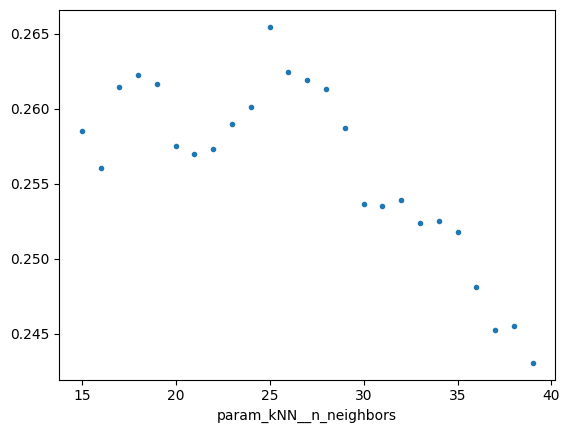

In [50]:
res3 = pd.DataFrame(search3.cv_results_)
res3.groupby('param_kNN__n_neighbors').mean_test_score.mean().plot(style = '.')

In [51]:
search3.best_score_

0.26544785544943766

In [53]:
search3.best_params_

{'kNN__n_neighbors': 25}

## search4

In [60]:
param_grid4 = {
    "kNN__p": np.linspace(0.1, 4, 20),
}

In [61]:
search4 = model_selection.GridSearchCV(
    pipe,
    param_grid4,
    cv=kf,
    n_jobs=-1,
    verbose=3,
)

In [62]:
search4.fit(X_new, y)

Fitting 25 folds for each of 20 candidates, totalling 500 fits
[CV 2/25] END .......................kNN__p=0.1;, score=0.198 total time=   0.0s
[CV 4/25] END ......................kNN__p=0.1;, score=-0.062 total time=   0.0s
[CV 5/25] END .......................kNN__p=0.1;, score=0.349 total time=   0.0s
[CV 6/25] END .......................kNN__p=0.1;, score=0.262 total time=   0.0s
[CV 8/25] END .......................kNN__p=0.1;, score=0.235 total time=   0.0s
[CV 13/25] END ......................kNN__p=0.1;, score=0.109 total time=   0.0s
[CV 14/25] END ......................kNN__p=0.1;, score=0.030 total time=   0.0s
[CV 15/25] END ......................kNN__p=0.1;, score=0.036 total time=   0.0s
[CV 11/25] END ......................kNN__p=0.1;, score=0.184 total time=   0.0s
[CV 12/25] END .....................kNN__p=0.1;, score=-0.007 total time=   0.0s
[CV 16/25] END ......................kNN__p=0.1;, score=0.142 total time=   0.0s
[CV 18/25] END ......................kNN__p=0.

[CV 16/25] END .......kNN__p=1.7421052631578948;, score=0.290 total time=   0.0s
[CV 22/25] END .......kNN__p=1.7421052631578948;, score=0.384 total time=   0.0s
[CV 14/25] END .......kNN__p=2.3578947368421055;, score=0.343 total time=   0.0s
[CV 18/25] END .......kNN__p=2.3578947368421055;, score=0.285 total time=   0.0s
[CV 21/25] END .......kNN__p=1.9473684210526316;, score=0.060 total time=   0.0s
[CV 19/25] END .......kNN__p=1.7421052631578948;, score=0.391 total time=   0.0s
[CV 21/25] END ........kNN__p=1.536842105263158;, score=0.071 total time=   0.0s
[CV 25/25] END ........kNN__p=1.536842105263158;, score=0.082 total time=   0.0s
[CV 25/25] END .......kNN__p=1.9473684210526316;, score=0.068 total time=   0.0s
[CV 2/25] END ........kNN__p=1.9473684210526316;, score=0.377 total time=   0.0s
[CV 14/25] END .......kNN__p=1.9473684210526316;, score=0.312 total time=   0.0s
[CV 17/25] END .......kNN__p=1.9473684210526316;, score=0.059 total time=   0.0s
[CV 4/25] END ........kNN__p

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=42),
             estimator=Pipeline(steps=[('kNN', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'kNN__p': array([0.1       , 0.30526316, 0.51052632, 0.71578947, 0.92105263,
       1.12631579, 1.33157895, 1.53684211, 1.74210526, 1.94736842,
       2.15263158, 2.35789474, 2.56315789, 2.76842105, 2.97368421,
       3.17894737, 3.38421053, 3.58947368, 3.79473684, 4.        ])},
             verbose=3)

<Axes: xlabel='param_kNN__p'>

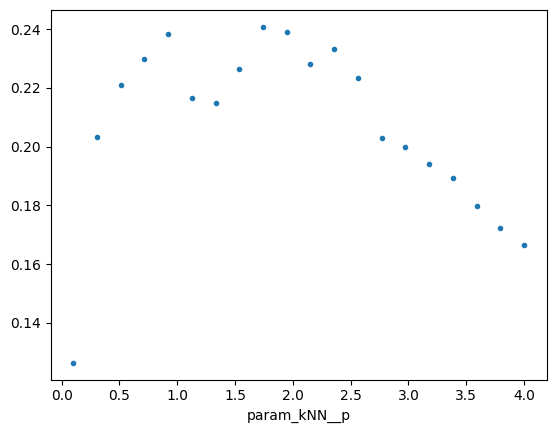

In [63]:
res4 = pd.DataFrame(search4.cv_results_)
res4.groupby('param_kNN__p').mean_test_score.mean().plot(style = '.')

In [65]:
search4.best_score_

0.24080340446412457

In [67]:
search4.best_params_

{'kNN__p': 1.7421052631578948}

## search5

In [70]:
select_kNN5 = feature_selection.SequentialFeatureSelector(neighbors.KNeighborsRegressor(n_neighbors = 25, p = 1.74), n_jobs=-1, cv=kf)
select_kNN5.fit(X, y)

In [ ]:
X_sel_feat_knn_names5 = X_new.columns[select_kNN5.get_support()]
X_sel_feat_knn5 = X_new[X_sel_feat_knn_names5]
X_sel_feat_knn5


In [ ]:
model_selection.cross_val_score(neighbors.KNeighborsRegressor(n_neighbors = 25, p = 1.74), X_sel_feat_knn5, y, cv=kf).mean()